# Exercise 1
A good idea when you load a new dataset is to explore it in order to get an overview of its characteristics, such as its size and the nature of the columns that are present in the dataset. There are several ways you can do this. Try the following in the cell below (create new cells if needed):

1. Simply open the dataframe by calling it by name
2. Try the '.describe()' method to see how many rows the dataset has and the different stats
3. Use the line of code below to see if you can identify if there are columns of data that are high correlated.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

caliquakes_df = pd.read_csv('Data\combined_eq_california_clean.csv')

# This gives information about the numeric columns in the dataset
display(caliquakes_df.describe())

# Another function you can use is .info()
# This tells you the number of rows, data type of each column, and the number of null values in that column
display(caliquakes_df.info())

,mag,tsunami,sig,nst,dmin,rms,gap,longitude,latitude,depth
count,313342.000000,313342.000000,313342.000000,303817.000000,226795.000000,309897.000000,307087.000000,313342.000000,313342.000000,313336.000000
mean,2.503171,0.000565,101.852379,20.500989,0.198006,0.197771,121.016289,-118.583263,37.001109,6.274206
std,0.510198,0.023760,56.402848,23.939964,0.296700,0.430229,82.354134,3.334398,4.004880,6.207468
min,2.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,-131.771000,24.007000,-3.500000
25%,2.140000,0.000000,70.000000,0.000000,0.038740,0.080000,57.000000,-121.236417,34.052000,2.232000
50%,2.350000,0.000000,85.000000,14.000000,0.089190,0.150000,92.400000,-118.096000,36.196250,5.385000
75%,2.700000,0.000000,112.000000,30.000000,0.224300,0.230000,175.000000,-116.320000,38.819500,8.777250
max,7.300000,1.000000,2910.000000,760.000000,7.538000,71.450000,360.000000,-107.001000,50.000000,257.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313342 entries, 0 to 313341
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   type       313342 non-null  object 
 1   time       313342 non-null  object 
 2   mag        313342 non-null  float64
 3   place      313342 non-null  object 
 4   status     313342 non-null  object 
 5   tsunami    313342 non-null  int64  
 6   sig        313342 non-null  int64  
 7   net        313342 non-null  object 
 8   nst        303817 non-null  float64
 9   dmin       226795 non-null  float64
 10  rms        309897 non-null  float64
 11  gap        307087 non-null  float64
 12  magType    313339 non-null  object 
 13  longitude  313342 non-null  float64
 14  latitude   313342 non-null  float64
 15  depth      313336 non-null  float64
dtypes: float64(8), int64(2), object(6)
memory usage: 38.2+ MB


None

In [7]:
caliquakes_df.select_dtypes(include = np.number).corr()

,mag,tsunami,sig,nst,dmin,rms,gap,longitude,latitude,depth
mag,1.000000,0.105394,0.907839,0.216672,0.189222,0.157596,0.069741,-0.062851,0.057988,0.098708
tsunami,0.105394,1.000000,0.211406,0.055195,0.049761,0.013834,-0.001837,-0.029367,0.014302,0.018876
sig,0.907839,0.211406,1.000000,0.278654,0.141701,0.139869,0.034810,-0.060108,0.050215,0.100912
nst,0.216672,0.055195,0.278654,1.000000,-0.301697,-0.025288,-0.336508,-0.275655,0.096612,0.103817
dmin,0.189222,0.049761,0.141701,-0.301697,1.000000,0.262457,0.575587,0.064888,0.022162,0.061208
rms,0.157596,0.013834,0.139869,-0.025288,0.262457,1.000000,0.109619,0.079734,0.000025,0.012316
gap,0.069741,-0.001837,0.034810,-0.336508,0.575587,0.109619,1.000000,-0.014580,-0.017261,0.131337
longitude,-0.062851,-0.029367,-0.060108,-0.275655,0.064888,0.079734,-0.014580,1.000000,-0.447134,-0.143655
latitude,0.057988,0.014302,0.050215,0.096612,0.022162,0.000025,-0.017261,-0.447134,1.000000,0.060641
depth,0.098708,0.018876,0.100912,0.103817,0.061208,0.012316,0.131337,-0.143655,0.060641,1.000000


# Exercise 2

For this next exercise, we are only interested in Earthquakes. So our first task will be to create a new version of `caliquakes_df` where only natural earthquakes are included. This will require you to remember your `pandas` skills from the last lecture!

Do the following:
1. Find out how many different types of 'quake' are included in this data. You can do this with one line of code. As always, look through the documentation to see if you can find a function that will help you
2. Find out how many natural earthquakes are in the dataset
3. Create a new version of `caliquakes_df` (keep the name!) that only includes 'earthquakes'

In [8]:
# List of all quakes types in the dataset
print(caliquakes_df['type'].unique())

# List + number of all quakes types in the dataset
print(caliquakes_df['type'].value_counts())

# Select all rows in which type == 'earthquake'
caliquakes_df = caliquakes_df[caliquakes_df['type'] == 'earthquake']

# After selecting only earthquakes...
print(caliquakes_df['type'].unique())

['earthquake' 'quarry blast' 'nuclear explosion' 'explosion' 'other event'
 'mine collapse' 'chemical explosion' 'sonic boom' 'rock burst'
 'Rock Slide' 'mining explosion' 'landslide' 'quarry' 'acoustic noise'
 'not reported']
type
earthquake            293145
quarry blast           14040
explosion               5429
nuclear explosion        355
rock burst               125
mining explosion          96
chemical explosion        73
sonic boom                32
other event               26
mine collapse             16
Rock Slide                 1
landslide                  1
quarry                     1
acoustic noise             1
not reported               1
Name: count, dtype: int64
['earthquake']


# Exercise 3

Plot a histogram showing the frequency of earthquakes with a magnitude greater than or equal to 6. Use red for the color of the bins. Limit your plot to 20 bins.

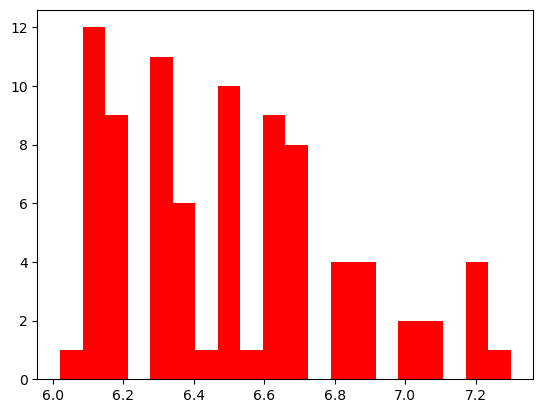

In [13]:
# Break it down slowly:
# First, create a boolean series (True/False series) where True is where 'mag' > 6: caliquakes_df['mag'] > 6
# Then filter the original dataframe by this boolean series:
large_eqs = caliquakes_df[caliquakes_df['mag'] > 6]

# We want to plot the 'mag' of the large earthquakes
# We want 20 bins, and we want the color of the bars to be red (or 'r' for short)
plt.hist(x = large_eqs['mag'], bins = 20, color = 'r');

## Exercise 4
Create a new dataframe called `caliquakes_light` that is a subset of caliquake_df and keeps only data with a magnitude >= 4.8 (to speed up the graphs) and only contains the following series:
* mag
* sig
* depth
* dmin
* rms
* nst

We will use this new dataframe later to plot our pairplot.

**Hint:** You can either drop entries from *caliquakes_df*, or select the six entries you need from that dataframe. The latter seams easier in this case. Remember: you can use the `.loc` method to retrieve specific records and columns, and multiple entries are passed by a list. Don't hesitate to google to find the solution, this is part of the process.

In [14]:
# Filter out all samples that are less than 4.8 magnitude
caliquakes_light = caliquakes_df[caliquakes_df['mag'] >= 4.8]

# Select only the relevant columns
# NOte that when you are selecting multiple columns, you need to use double square brackets
caliquakes_light = caliquakes_light[['mag', 'sig', 'depth', 'dmin', 'rms', 'nst']]

caliquakes_light

,mag,sig,depth,dmin,rms,nst
403,5.00,385,33.00,NaN,NaN,NaN
467,5.90,536,10.00,NaN,NaN,NaN
652,5.40,449,33.00,NaN,NaN,NaN
663,5.22,419,10.75,NaN,0.3600,17.0
697,5.10,400,33.00,NaN,NaN,NaN
...,...,...,...,...,...,...
311794,4.90,384,6.50,0.0300,0.1765,21.0
312211,4.80,378,5.20,0.0410,0.1740,32.0
312433,5.53,1380,8.44,0.0396,0.2100,85.0
312762,4.93,875,11.54,0.0189,0.3100,111.0


# Exercise 5: identifying the position of the San Andreas Fault using density plot functions

In this exercise, you will use your newfound skills in the matplotlib and seaborn libraries, plus some new ones that you will acquire by reading the documentation for two new methods. The goal is to identify the position of the San Andreas Fault system (there might be more than one main fault plane here) on a map of California. We will assume that the location of the epicentre of an earthquakes is a good proxy for the location of the fault plane.

To do this, we will:

1. Draw a density plot of the epicentre of earthquakes on top of the map of California we have used in the previous Notebook. To do this, you will need to use a new function in the Seaborn library called a `kdeplot`. Search the seaborn documentation and read about it to know how to use it. Then create a plot similar to the scatter plot we created in the last Notebook, but using a `kdeplot` (i.e., a density function) to create a contour map showing the frequency of earthquakes across California. We will use the coordinates of these earthquakes to draw some conclusions.
2. One issue is that your dataset is very, very large. You have over 300k datapoints in it. This means drawing this plot will be very slow, and you might wait 5 to 10 minutes for your results. While this is unavoidable in some scenarios (you'll find that a lot of machine learning, especially deep learning, involves a lot of waiting) you can do better in this particular case. Specifically, do we really need *all* of the earthquakes in our dataset to get a good idea of the position of the San Andreas fault? Probably not. Thus, we will exploit a new function in Pandas called `sample`. Google the documentation to see how to use it. Then try to sample different fractions of your dataset until you find a sweet spot between computational expense (i.e., how long it takes to plot the data) and a well-defined position for our fault(s).

We're doing this in a separate notebook so that you can practice importing the libraries and data that you need for your work. Create as many cells as you need, keep your notebook clean, and add some descriptions using Markdown if necessary. Your notebook should be executable from the top of the notebook to the end of the notebook (i.e., there should be no issues if you click on Cell -> Run All).

The goal of this exercise is to end up with a map that looks something like this: 

![alt_text](img/san_andreas_answer.png "Answer")

Good luck, and have fun!

c:\Users\tranq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tranq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


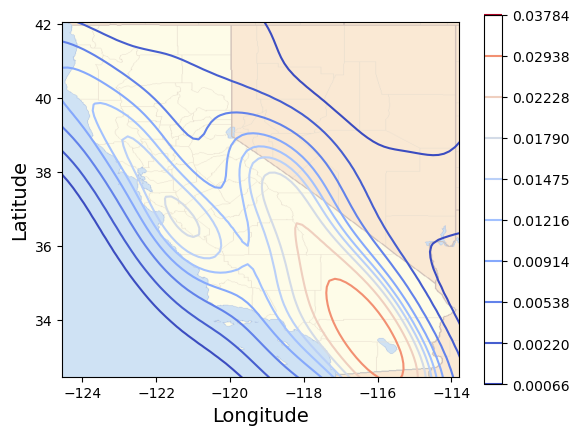

In [26]:
# Reload data
caliquakes_df = pd.read_csv('Data\combined_eq_california_clean.csv')

# Filter out non-earthquake data
caliquakes_df = caliquakes_df[caliquakes_df['type'] == 'earthquake']

# Because we have so many samples, we want to select only 10% of the data (I have used 1% here to make it faster to plot)
# We do this using the .sample() method
caliquakes_df_sampled = caliquakes_df.sample(frac = 0.01)

# Create a Seaborn plot
# kdeplots take in a data, x, and y argument. 
# In addition, we want to use a colormap ('cmap') because we want the areas with more earthquakes to show up 
# as a darker colour. There are a wide variety of cmaps that you can use in seaborn
# Play around with some of the arguments
sns.kdeplot(data = caliquakes_df_sampled, x = 'longitude', y = 'latitude', cmap = 'coolwarm', cbar = True)

# Import image for backdrop
california_img = plt.imread('img/california.png')

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.show();